In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

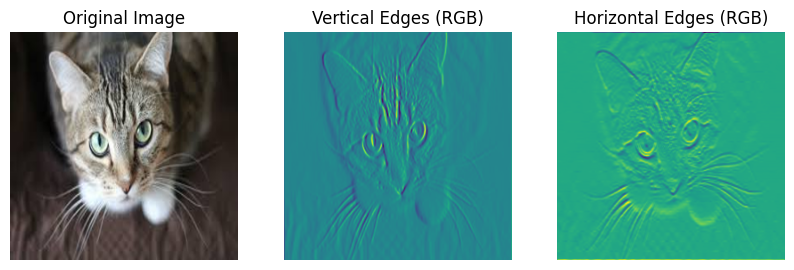

In [ ]:
#Load an Image using PIL
image= Image.open("cat sample img.jpg").convert("RGB") #Load as RGB
image= image.resize((256,256)) #Resize for simplicity
image= np.array(image, dtype=np.float32)/255.0 # Convert to float32 and normalize

#Add batch dimension (1 ,256 ,256 ,3)
image= np.expand_dims(image,axis=0)

#Define vertical and horizontal edge detection filters(Sobel-like)
vertical_filter= np.array([[1,0,-1],
                           [1,0,-1],
                           [1,0,-1]], dtype=np.float32)
horizontal_filter= np.array([[1,1,1],
                            [0,0,0],
                            [-1,-1,-1]], dtype=np.float32)

# Reshape filters for tensorflow (H, W, in_channels, out_channels)
vertical_filter = vertical_filter.reshape(3, 3, 1, 1)
horizontal_filter = horizontal_filter.reshape(3, 3, 1, 1)

# To apply the same filter to each color channel, we can tile the filter
vertical_filter_rgb = np.tile(vertical_filter, [1, 1, 3, 1])
horizontal_filter_rgb = np.tile(horizontal_filter, [1, 1, 3, 1])


#Apply convolution
vertical_edges= tf.nn.conv2d(image, vertical_filter_rgb, strides=[1,1,1,1], padding="SAME")
horizontal_edges= tf.nn.conv2d(image, horizontal_filter_rgb, strides=[1,1,1,1], padding="SAME")

#Convert tensors to numpy for visualization
vertical_edges= vertical_edges.numpy().squeeze()
horizontal_edges= horizontal_edges.numpy().squeeze()

#Plot original and filtered images
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(image.squeeze())
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(vertical_edges)
plt.title("Vertical Edges (RGB)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(horizontal_edges)
plt.title("Horizontal Edges (RGB)")
plt.axis("off")

plt.show()

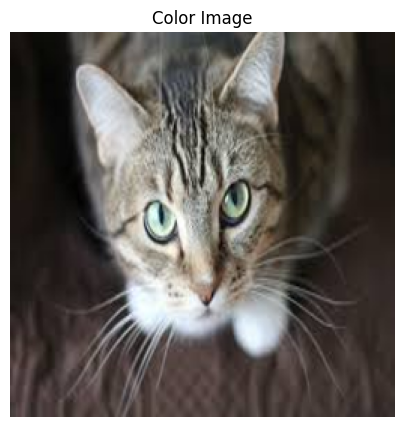

In [ ]:
# Load an image using PIL in color
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_color = Image.open("cat sample img.jpg").convert("RGB") # Load as RGB
image_color = image_color.resize((256, 256)) # Resize for simplicity
image_color = np.array(image_color, dtype=np.float32) / 255.0 # Normalize to range [0,1]

# Display the color image
plt.figure(figsize=(5, 5))
plt.imshow(image_color)
plt.title("Color Image")
plt.axis("off")
plt.show()

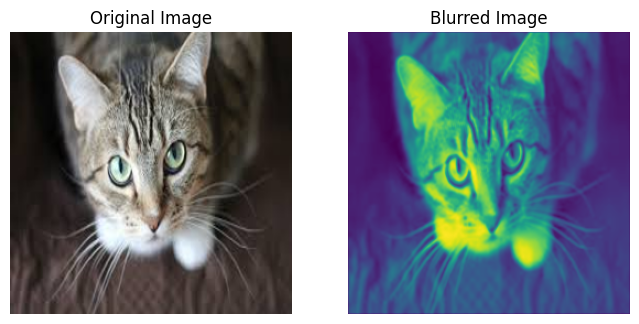

In [ ]:
# Load an image using PIL
image = Image.open("cat sample img.jpg").convert("RGB")  # Convert to grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Normalize to range [0,1]

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=0) # Add batch dimension
# image = np.expand_dims(image, axis=-1) # Add channel dimension - removed for RGB

# Define a 3x3 blurring filter (averaging kernel)
blur_filter = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

# Reshape the filter for TensorFlow (H, W, in_channels, out_channels)
blur_filter = blur_filter.reshape(3, 3, 1, 1)

# To apply the same filter to each color channel, we can tile the filter
blur_filter_rgb = np.tile(blur_filter, [1, 1, 3, 1])

# Apply convolution for blurring
blurred_image = tf.nn.conv2d(image, blur_filter_rgb, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensor to numpy for visualization
blurred_image = blurred_image.numpy().squeeze()

# Plot original and blurred images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze()) # Display original RGB image
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_image) # Display blurred RGB image
plt.title("Blurred Image")
plt.axis("off")

plt.show()